# 母平均の仮説検定と区間推定

黒木玄

2019-09-14

正規分布モデルとt分布を用いた母集団平均の両側検定と区間推定について解説する.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
\newcommand\cosec{\operatorname{cosec}}
\newcommand\sign{\operatorname{sign}}
\newcommand\sinc{\operatorname{sinc}}
\newcommand\real{\operatorname{Re}}
\newcommand\imag{\operatorname{Im}}
\newcommand\Li{\operatorname{Li}}
\newcommand\PROD{\mathop{\coprod\kern-1.35em\prod}}
$

## 注意
- [オリジナル](https://github.com/genkuroki/Statistics/blob/master/Hypothesis%20test%20and%20interval%20estimation%20for%20population%20mean.ipynb)
    - [nbviewer](https://nbviewer.jupyter.org/github/genkuroki/Statistics/blob/master/Hypothesis%20test%20and%20interval%20estimation%20for%20population%20mean.ipynb)
- 追記版: [URL startistics/006](https://github.com/phasetr/mathcodes/blob/master/julia/statistics/006_Hypothesis_test_and_interval_estimation_for_population_mean.ipynb)
    - [nbviewer](https://nbviewer.jupyter.org/github/phasetr/mathcodes/blob/master/julia/statistics/006_Hypothesis_test_and_interval_estimation_for_population_mean.ipynb)

他と同じく黒木玄さんによる資料を適宜追記・修正・編集して作ったコンテンツです.
解説部分は別途PDFにまとめてあります.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#母平均の仮説検定" data-toc-modified-id="母平均の仮説検定-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>母平均の仮説検定</a></span><ul class="toc-item"><li><span><a href="#設定" data-toc-modified-id="設定-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>設定</a></span></li><li><span><a href="#正規分布モデルによる母集団平均に関する両側検定" data-toc-modified-id="正規分布モデルによる母集団平均に関する両側検定-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>正規分布モデルによる母集団平均に関する両側検定</a></span><ul class="toc-item"><li><span><a href="#正規分布モデルによる母集団平均に関する両側検定の設定" data-toc-modified-id="正規分布モデルによる母集団平均に関する両側検定の設定-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>正規分布モデルによる母集団平均に関する両側検定の設定</a></span></li><li><span><a href="#正規分布モデルによる母集団平均に関する両側検定の作成" data-toc-modified-id="正規分布モデルによる母集団平均に関する両側検定の作成-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>正規分布モデルによる母集団平均に関する両側検定の作成</a></span></li></ul></li></ul></li><li><span><a href="#母平均の信頼区間" data-toc-modified-id="母平均の信頼区間-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>母平均の信頼区間</a></span></li><li><span><a href="#仮説検定や区間推定がモデルに強く依存していることの重要性" data-toc-modified-id="仮説検定や区間推定がモデルに強く依存していることの重要性-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>仮説検定や区間推定がモデルに強く依存していることの重要性</a></span><ul class="toc-item"><li><span><a href="#全体の平均値に大きな影響を与える小集団が母集団に含まれている場合" data-toc-modified-id="全体の平均値に大きな影響を与える小集団が母集団に含まれている場合-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>全体の平均値に大きな影響を与える小集団が母集団に含まれている場合</a></span></li><li><span><a href="#それではどうすればよいのか？" data-toc-modified-id="それではどうすればよいのか？-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>それではどうすればよいのか？</a></span></li></ul></li><li><span><a href="#他の計算例" data-toc-modified-id="他の計算例-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>他の計算例</a></span></li></ul></div>

## ライブラリ読み込み・関数定義

In [1]:
using Base64
showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end
using Distributions
using Plots
pyplot(size=(400, 250), titlefontsize=10, fmt=:svg)

Plots.PyPlotBackend()

## 母平均の仮説検定

### 正規分布モデルによる母集団平均に関する両側検定
正規分布モデルを用いて, 母集団平均に関する両側検定の手続きを作ろう.

### 正規分布モデルによる母集団平均に関する両側検定の設定

### 正規分布の確率密度函数

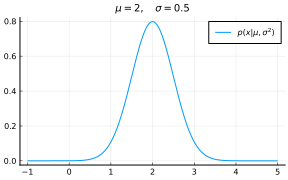

In [2]:
μ, σ = 2, 0.5
x = range(-1, 5, length=400)
plot(x, pdf.(Normal(μ, σ), x); label="\$p(x|\\mu, \\sigma^2)\$", title="\$\\mu = $μ, \\quad \\sigma = $σ\$")
#pngname = "images/006_01_normal_dist.png"
#savefig(pngname)

### t分布の確率密度函数
- [Distribution.ccdf](https://juliastats.org/Distributions.jl/v0.14/univariate.html#Distributions.ccdf-Tuple{Distributions.Distribution{Distributions.Univariate,S}%20where%20S%3C:Distributions.ValueSupport,Real})

> The complementary cumulative function evaluated at `x`, i.e. `1 - cdf(d, x)`.

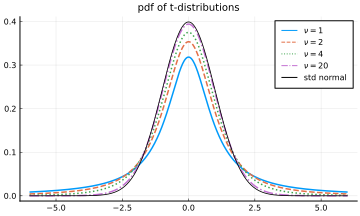

In [3]:
x = range(-6, 6, length=400)
P = plot(; title="pdf of t-distributions", size=(500, 300))
for ν in [1, 2, 4, 20]
    plot!(P, x, pdf.(TDist(ν), x); label="\$\\nu = $ν\$", ls=:auto, lw=1.5)
end
plot!(P, x, pdf.(Normal(), x); label="std normal", color=:black, lw=0.8)

#pngname = "images/006_02_t_dist.png"
#savefig(pngname)
#showimg("image/png", pngname)

### 正規分布モデルによる母集団平均に関する両側検定の作成

#### 計算例
$T$ 統計量とp値を計算する函数は以下のように作れる.
母集団分布が平均 $\mu_0$, 分散 $\sigma_0^2$ の正規分布のとき, 
そのサイズ $n$ のサンプルの仮説 $M(\mu_0)$ のもとでのp値が $\alpha=0.05$ 未満になる確率は $\alpha=0.05$ になる. 

In [4]:
T_statistic(μ, X) = (mean(X) - μ)/√(var(X)/length(X))
p_value(μ, X) = 2ccdf(TDist(length(X)-1), abs(T_statistic(μ, X)))

α = 0.05
μ₀, σ₀ = 2.0, 0.5
n = 10
L = 10^5
X = rand(Normal(μ₀, σ₀), n, L)
count(p_value(μ₀, @view X[:, j]) < α for j in 1:size(X,2))/L

0.05027

## 母平均の信頼区間

### 計算例
平均の信頼区間を計算する函数は以下のように作れる.  
母集団分布が平均 $\mu_0$, 分散 $\sigma_0^2$ の正規分布のとき,
そのサイズ $n$ のサンプルの信頼係数 $1-\alpha = 0.95$ の信頼区間が $\mu=0$ を含む確率は $1-\alpha=0.95$ になる.

#### 信頼区間
- [Distributions](https://juliastats.org/Distributions.jl/stable/univariate/#Distributions.cquantile-Tuple{Distribution{Univariate,S}%20where%20S%3C:ValueSupport,Real})

> `cquantile(d::UnivariateDistribution, q::Real)`
>
> The complementary quantile value, i.e. {quantile(d, 1-q){.

In [5]:
function confidence_interval(α, X)
    n = length(X)
    τ = cquantile(TDist(n-1), α/2)
    Xbar = mean(X)
    U² = var(X)
    (Xbar - τ*√(U²/n), Xbar + τ*√(U²/n))
end

confidence_interval (generic function with 1 method)

#### 信頼区間の中にいるか

In [6]:
function is_in_confidence_interval(α, X, μ)
    a, b = confidence_interval(α, X)
    a ≤ μ ≤ b
end

is_in_confidence_interval (generic function with 1 method)

#### 真の値が信頼区間の中にあるか

In [7]:
function prob_of_true_val_is_in_confint(
        dist;
        n = 30,
        L = 10^6,
        α = 0.05
    )
    X = rand(dist, n, L)
    μ₀ = mean(dist)
    count(is_in_confidence_interval(α, @view(X[:,j]), μ₀) for j in 1:L)/L
end

prob_of_true_val_is_in_confint (generic function with 1 method)

#### 計算

In [8]:
μ₀, σ₀ = 2.0, 0.5
prob_of_true_val_is_in_confint(Normal(μ₀, σ₀); n=30, α=0.05)

0.949776

### グラフ
母集団分布が平均 $\mu_0$, 分散 $\sigma_0^2$ の正規分布のとき, 
そのサンプルを1000個生成し, その各々の95%信頼区間を計算して, 
その区間が $\mu_0$ を含むものを薄い青色, 含まないものを赤色でプロットしたものである.

#### 信頼区間のプロット

In [9]:
function plot_CIs(μ₀, α, X; indices=1:500)
    P = plot(; size=(1000, 150), legend=false)
    for i in indices
        a, b = confidence_interval(α, @view(X[:,i]))
        color = ifelse(a ≤ μ₀ ≤ b, :cyan, :red)
        plot!([i,i], [a,b], color=color)
    end
    plot!([minimum(indices), maximum(indices)], [μ₀, μ₀], color=:black, ls=:dot)
    plot!(xlim=(minimum(indices)-10, maximum(indices)+5))
end

plot_CIs (generic function with 1 method)

#### 1000個生成してプロット

In [10]:
function plot1000CIs(population_dist; n=30, α=0.05)
    L = 1000
    μ₀ = mean(population_dist)
    X = rand(population_dist, n, L)

    # 横に長くなりすぎるため半分で割っただけ
    P1 = plot_CIs(μ₀, α, X; indices=1:500)
    P2 = plot_CIs(μ₀, α, X; indices=501:1000)
    plot(P1, P2, size=(1000, 300), layout=grid(2,1))

    #pngname = "images/006_03_plot_1000.png"
    #savefig(pngname)
    #showimg("image/png", pngname)
end

plot1000CIs (generic function with 1 method)

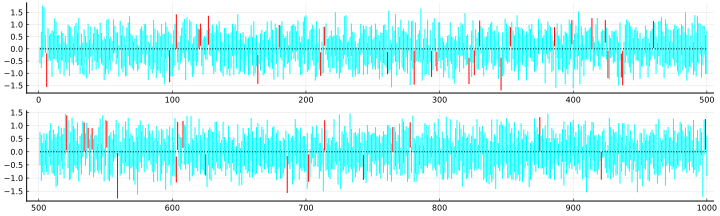

In [11]:
plot1000CIs(Normal(); n=10, α=0.05)

## 仮説検定や区間推定がモデルに強く依存していることの重要性

### 全体の平均値に大きな影響を与える小集団が母集団に含まれている場合
母集団のうち95%は標準正規分布にしたがっており, 残りの5%は平均50, 分散1の正規分布に従っていると仮定する.
次のセルでその分布の確率密度函数をプロットしておく.

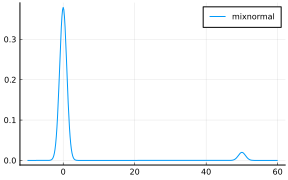

In [12]:
mixnormal = MixtureModel([Normal(), Normal(50, 1)], [0.95, 0.05])
x = range(-10, 60, length=400)
plot(x, pdf.(mixnormal, x), label="mixnormal")

#pngname = "images/006_04_mixnormal.png"
#savefig(pngname)
#showimg("image/png", pngname)

このとき, その母集団のサイズ $n=30$ のサンプルに例外的な5%の小集団の要素が1つも含まれない確率は21%強にもなる. サイズ $n=30$ のサンプルだと例外的な5%の存在を完全に見逃す可能性が20%を超えている. このような可能性が疑われる場合には, 正規分布モデルに基いた信頼区間は機能しなくなる.

In [13]:
0.95^30

0.21463876394293727

以下のセルでは, 上の設定の母集団のサイズ30のサンプルを100万個生成し, その各々について95%信頼区間を計算し, 信頼区間に母集団分布の平均が含まれる割合を計算している.  95%には程遠い78%程度の割合になる.

In [14]:
@time prob_of_true_val_is_in_confint(mixnormal; n=30, α=0.05)

 14.546369 seconds (90.31 M allocations: 2.028 GiB, 10.79% gc time)


0.783467

次のセルでは, 上の母集団のサイズ30のサンプルを1000個生成して, 各々の95%信頼区間プロットしている. 赤線は母集団の平均を含まない信頼区間である.  例外の5%をサンプルが1つも含まないケースが結構多いせいで, 信頼区間が狭くなってしまって, 区間推定に完全に失敗するケースが無視できないだけ大量に発生していることがわかる.

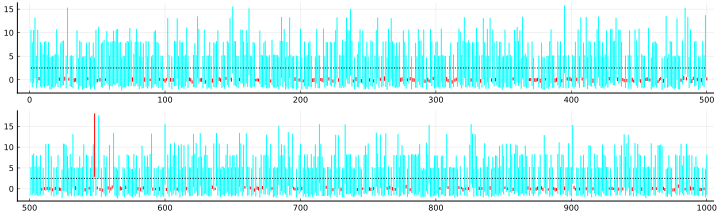

In [15]:
plot1000CIs(mixnormal; n=30, α=0.05)
#pngname = "images/006_05_mixnormal_plot1000_n30.png"
#savefig(pngname)
#showimg("image/png", pngname)

以下では以上と同じことをサイズ $n=100$ のサンプルで行っている. 95%信頼区間に母集団の平均が含まれる割合は90%に届かない. そうなってしまう理由はサイズ $n=100$ のサンプルに5%の例外が1つも含まれないことはまれだが(0.6%弱), 5%の例外の含まれる確率が5%よりも小さ過ぎると, 信頼区間が小さい方に偏り過ぎてしまうことになってしまうからだ. 

要するに, この場合にはサンプルサイズを $n=100$ まで増やしても, 正規分布モデルを使った区間推定を信頼してはいけないということである.

In [16]:
0.95^100

0.005920529220333998

In [17]:
@time prob_of_true_val_is_in_confint(mixnormal; n=100, α=0.05)

 37.466647 seconds (300.00 M allocations: 6.706 GiB, 10.54% gc time)


0.892216

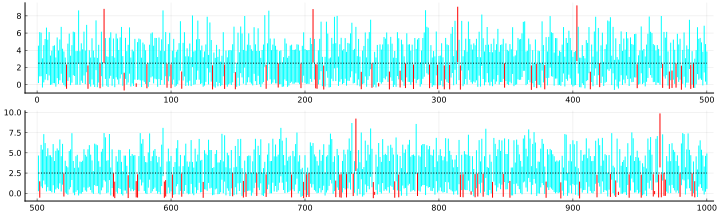

In [18]:
plot1000CIs(mixnormal; n=100, α=0.05)
#pngname = "images/006_06_mixnormal_plot1000_n100.png"
#savefig(pngname)
#showimg("image/png", pngname)

### それではどうすればよいのか？

前節の計算結果を見ればわかるように, 母集団の95%が正規分布に従っていたとしても, 全体の平均に大きな影響を与える5%の小集団を母集団分布が含んでいるだけで, 正規分布モデルに基いた区間推定は破綻する.

だから, 正規分布モデルに基いた区間推定を使用する場合には, そのような状況ではないことを別の議論で示しておく必要がある.  

例えば, サンプルが何らかの測定の繰り返しによって得られたものであれば, 過去の同様の測定のデータでは全体の平均に大きな影響を与える小集団がまったく観測されていないことを理由に今回の場合にもそのように仮定してよいと主張することは十分合理的だと思われる.

このように, 正規分布モデルを使った単純な区間推定でさえ, 過去の調査や実験の結果がどうであったかに関する情報は重要な役目を果たすのである. 

結果的に母集団分布に正規分布モデルを適用することが不適切だとわかった場合には当然他のより適切なモデルを探して推定に役に立てるべきだろう.

統計学入門書ではこの点について十分な説明がないようなので, みんな注意するべきだと思う.

## 他の計算例

### 一様分布

prob_of_true_val_is_in_confint(Uniform(); n = 30, α = 0.05) = 0.949376


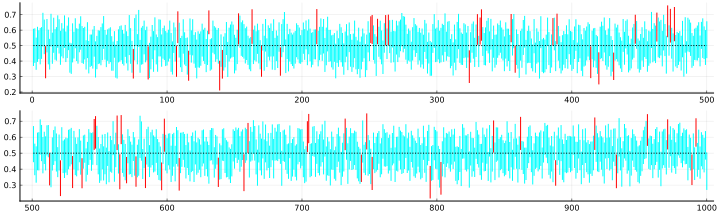

In [19]:
@show prob_of_true_val_is_in_confint(Uniform(); n=30, α=0.05)
plot1000CIs(Uniform(0, 1); n=30, α=0.05)

#pngname = "images/006_07_uniform_plot1000_n30.png"
#savefig(pngname)
#showimg("image/png", pngname)

### ガンマ分布

prob_of_true_val_is_in_confint(Gamma(10, 0.1); n = 30, α = 0.05) = 0.947825


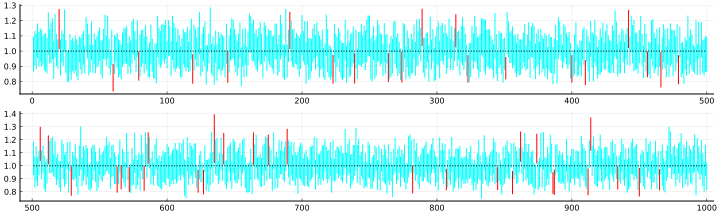

In [20]:
@show prob_of_true_val_is_in_confint(Gamma(10, 0.1); n=30, α=0.05)
plot1000CIs(Gamma(10, 0.1); n=30, α=0.05)

#pngname = "images/006_08_Gamma_plot1000_n30.png"
#savefig(pngname)
#showimg("image/png", pngname)

### 指数分布

prob_of_true_val_is_in_confint(Exponential(); n = 30, α = 0.05) = 0.92704


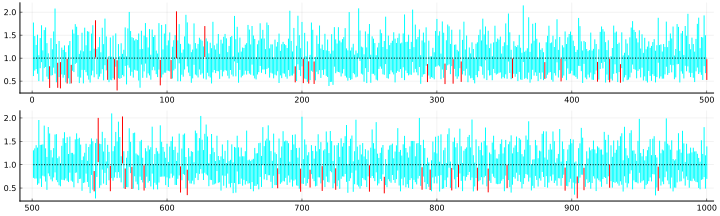

In [21]:
@show prob_of_true_val_is_in_confint(Exponential(); n=30, α=0.05)
plot1000CIs(Exponential(); n=30, α=0.05)

#pngname = "images/006_09_Exponential_plot1000_n30.png"
#savefig(pngname)
#showimg("image/png", pngname)

### 対数正規分布

prob_of_true_val_is_in_confint(LogNormal(); n = 30, α = 0.05) = 0.882724


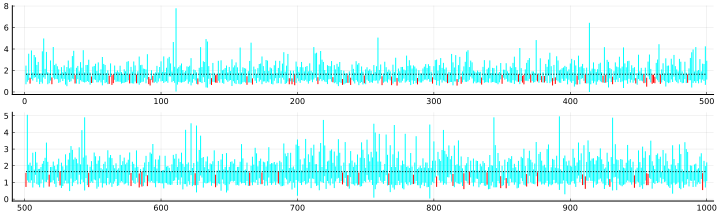

In [22]:
@show prob_of_true_val_is_in_confint(LogNormal(); n=30, α=0.05)
plot1000CIs(LogNormal(); n=30, α=0.05)

#pngname = "images/006_10_LogNormal_plot1000_n30.png"
#savefig(pngname)
#showimg("image/png", pngname)

### ベータ分布

prob_of_true_val_is_in_confint(Beta(0.1, 10); n = 30, α = 0.05) = 0.813946


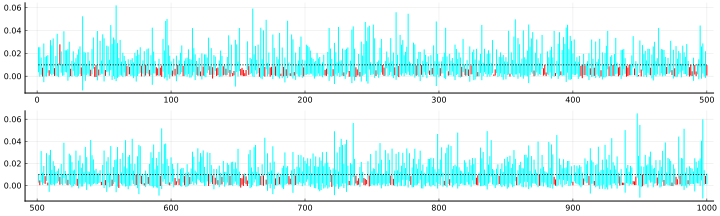

In [23]:
@show prob_of_true_val_is_in_confint(Beta(0.1, 10); n=30, α=0.05)
plot1000CIs(Beta(0.1, 10); n=30, α=0.05)

#pngname = "images/006_11_Beta_plot1000_n30.png"
#savefig(pngname)
#showimg("image/png", pngname)